<a href="https://colab.research.google.com/github/bikash-bhoi/eva4/blob/master/Session13/Session13B_Custom_YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 14.71 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [0]:
!mkdir YoloV3

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!cp -r /content/gdrive/My\ Drive/Yolo_Files/Yolov3_Custom_training/* .


In [0]:
!cp -r /content/gdrive/My\ Drive/Yolo_Files/Yolov3_Custom_training/YoloV3/output/* /content/YoloV3/output/

In [2]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P4', major=6, minor=1, total_memory=7611MB, multi_processor_count=20)


In [3]:
ls

gdrive/  sample_data/  YoloV3/


In [4]:
cd YoloV3/

/content/YoloV3


In [5]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


In [6]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

2020-04-25 01:05:31.246180: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 6842.26it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 115.98it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 8120.63it/s]

In [15]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 60 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=60, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

2020-04-25 02:30:19.469819: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (577 found, 0 missing, 1 empty, 0 duplicate, for 578 images): 100% 578/578 [00:00<00:00, 8662.60it/s]
Caching images (0.3GB): 100% 578/578 [00:00<00:00, 612.63it/s]
Caching labels (577 found, 0 missing, 1 empty, 0 duplicate, for 578 images): 100% 578/578 [00:00<00:0

In [0]:
#!rm -f /content/YoloV3/out_out/*

In [20]:
!python detect.py --conf-thres 0.1 --source output --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='output', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/553 output/download.jpeg: 512x512 1 BB8s, Done. (0.037s)
image 2/553 output/image-1700.jpg: 320x512 1 BB8s, Done. (0.030s)
image 3/553 output/image-1701.jpg: 320x512 1 BB8s, Done. (0.028s)
image 4/553 output/image-1702.jpg: 320x512 1 BB8s, Done. (0.027s)
image 5/553 output/image-1703.jpg: 320x512 1 BB8s, Done. (0.027s)
image 6/553 output/image-1704.jpg: 320x512 1 BB8s, Done. (0.027s)
image 7/553 output/image-1705.jpg: 320x512 1 BB8s, Done. (0.026s)
image 8/553 output/image-1706.jpg: 320x512 1 BB8s, Done. (0.026s)
image 9/553 outpu

In [0]:
cp /content/YoloV3/out_out/* /content/gdrive/My\ Drive/Yolo_Files/Yolov3_Custom_training/YoloV3/output_box

In [0]:
cp /content/YoloV3/weights/last.pt /content/gdrive/My\ Drive/Yolo_Files/Yolov3_Custom_training/YoloV3/weights/

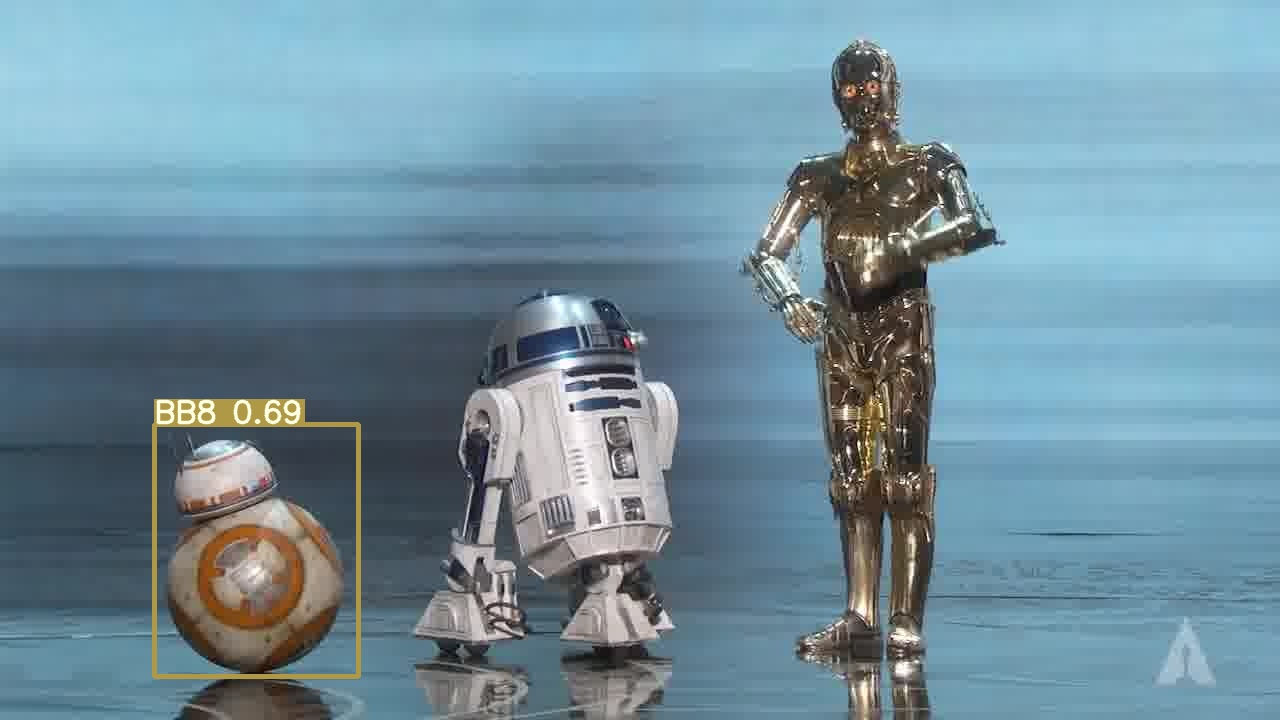

In [21]:
Image(filename='out_out/image-1701.jpg', width=600)

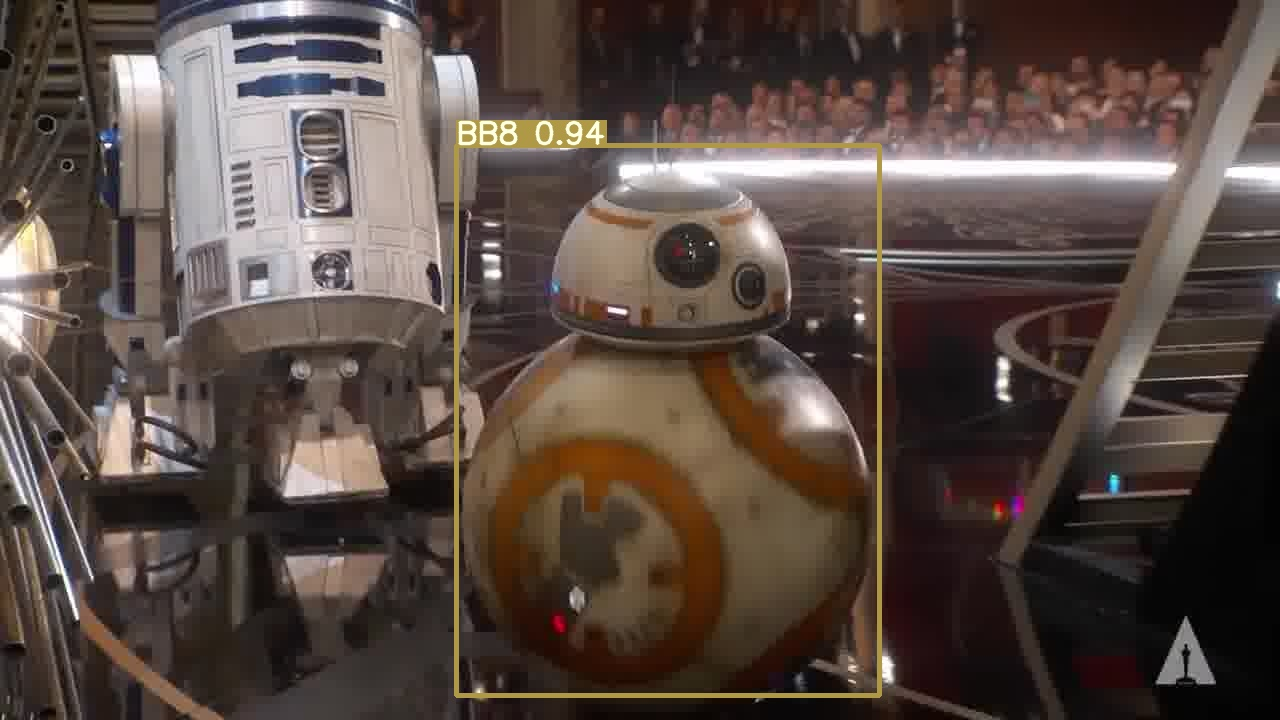

In [24]:
Image(filename='out_out/image-2104.jpg', width=600)

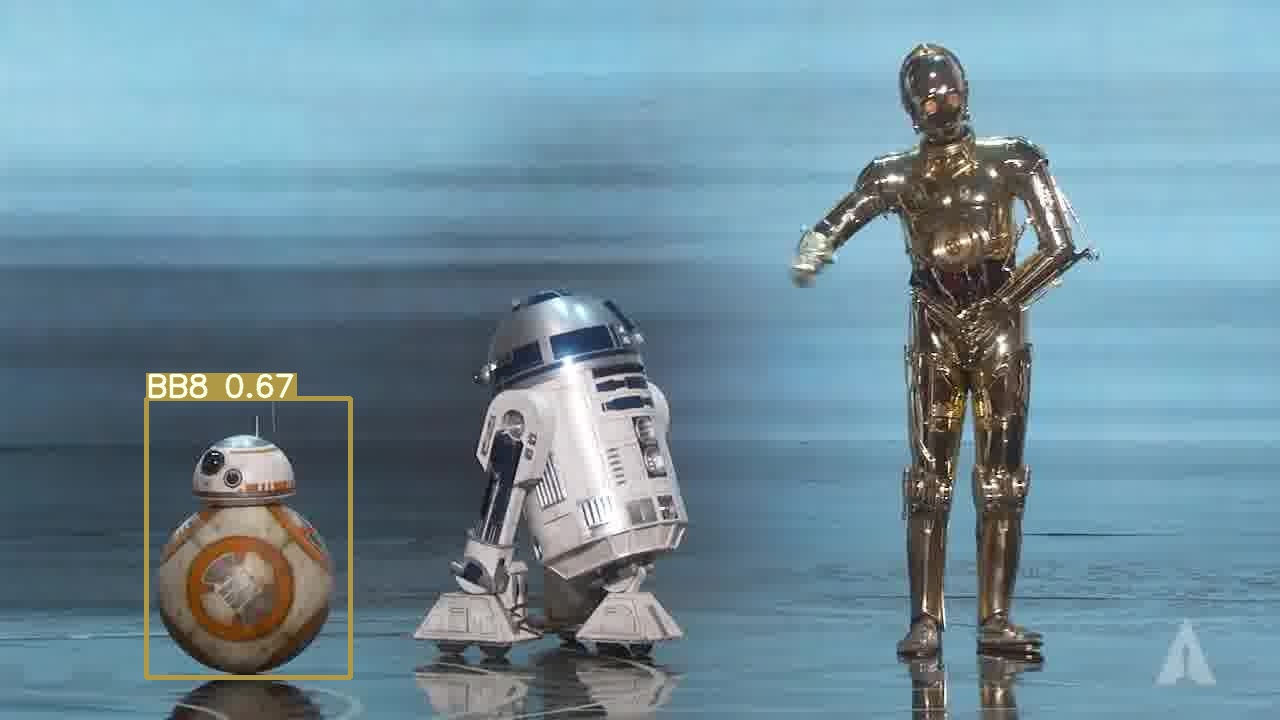

In [25]:
Image(filename='out_out/image-1901.jpg', width=600)